Basic usage aglcheck
===

In [1]:
from __future__ import print_function
%matplotlib inline
from IPython.core.display import HTML
from aglcheck import compare_sets, examplestringdata, get_examplestringdata, htmltables, read_stringdata, StringData 

Reading strings
---

Before we can do anything, we need to get the strings into a _StringData_ object. There are two ways of doing this.

1) Provide strings directly

In [2]:
sd = StringData(strings=['ABA', 'BAB', 'AABA', 'BBA', 'BAA', 'ABBA'])
print(sd)

<stringdata: ABA BAB AABA BBA BAA ABBA>


2) Read strings from a special text file (yaml format) that contains string information. See 'examplestringfile.yaml' for an example that you can use as a template.

In [3]:
sd = read_stringdata('examplestringfile.yaml')
print(sd)

<stringdata: ABA BAB AABA BBA BAA ABBA>


Comparing strings
---

Next, we want to compare the strings in the data set, using a comparison function. For example, we want to look for the longest shared substrings.

In [4]:
ct = compare_sets.longestsubstringlength(sd)

 The object that was returned, a ComparisonTable, can be used for direct vizualization of the results:

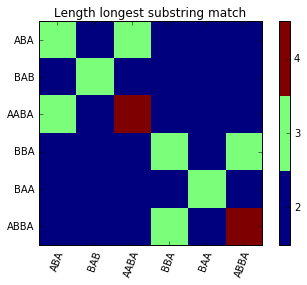

In [5]:
compare_sets.plot_comparison(ct)

Or to get the results as a matrix that can be used for further evaluations:

In [6]:
ct.get_matrix()

[[3, 2, 3, 2, 2, 2],
 [2, 3, 2, 2, 2, 2],
 [3, 2, 4, 2, 2, 2],
 [2, 2, 2, 3, 2, 3],
 [2, 2, 2, 2, 3, 2],
 [2, 2, 2, 3, 2, 4]]

The order of the rows and columns correspond to the sequence of strings in the StringData object

In [7]:
sd.strings

['ABA', 'BAB', 'AABA', 'BBA', 'BAA', 'ABBA']

Alternatively, you want an HTML table that highlights the longest shared substrings. The returned HTML code can be written to file or shown in a notebook. To do the latter use the ipython HTML function. 

In [8]:
html = htmltables.longestsubstringstable(sd)
HTML(html)

,ABAABA,BABBAB,AABAAABA,BBABBA,BAABAA,ABBAABBA
ABAABA,ABA ABA,ABA BABABA BAB,ABA AABA,ABA BBA,ABA BAA,ABA ABBAABA ABBA
BABBAB,BAB ABABAB ABA,BAB BAB,BAB AABABAB AABA,BAB BBA,BAB BAA,BAB ABBABAB ABBA
AABAAABA,AABA ABA,AABA BABAABA BAB,AABA AABA,AABA BBA,AABA BAAAABA BAA,AABA ABBAAABA ABBA
BBABBA,BBA ABA,BBA BAB,BBA AABA,BBA BBA,BBA BAA,BBA ABBA
BAABAA,BAA ABA,BAA BAB,BAA AABABAA AABA,BAA BBA,BAA BAA,BAA ABBA
ABBAABBA,ABBA ABAABBA ABA,ABBA BABABBA BAB,ABBA AABAABBA AABA,ABBA BBA,ABBA BAA,ABBA ABBA


String labels
---

You want to refer to strings with a label, not the string itself. For example, if strings are long, or have different functions. You can do this by providing the strings in a different way, not as a list of strings, but a list of dictionaries:

In [9]:
sd = StringData(strings=[{'Go': 'abcdefg'}, {'NoGo': 'hijklmn'}, {'Test1': 'cdefgij'}, {'Test2': 'klmnefg'}])
print(sd)

<stringdata: Go NoGo Test1 Test2>


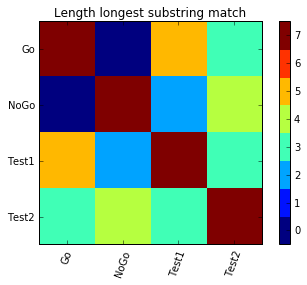

In [10]:
ct = compare_sets.longestsubstringlength(sd)
compare_sets.plot_comparison(ct)

In [11]:
html = htmltables.longestsubstringstable(sd)
HTML(html)

,Goabcdefg,NoGohijklmn,Test1cdefgij,Test2klmnefg
Goabcdefg,abcdefg abcdefg,,abcdefg cdefgij,abcdefg klmnefg
NoGohijklmn,,hijklmn hijklmn,hijklmn cdefgij,hijklmn klmnefg
Test1cdefgij,cdefgij abcdefg,cdefgij hijklmn,cdefgij cdefgij,cdefgij klmnefg
Test2klmnefg,klmnefg abcdefg,klmnefg hijklmn,klmnefg cdefgij,klmnefg klmnefg
